In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# f score 
from sklearn.metrics import f1_score
# classification report
from sklearn.metrics import classification_report
# models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC



The test data used the gender_submission file to fill in the missing survival data. However apparently this is someone elses solution file not the missing data which explains why the models are performing so well. 

In [2]:
# DATASETS
train_data = pd.read_csv('new_train_data.csv')
test_data = pd.read_csv('new_test_data.csv')

In [3]:
# TRAINING DATA
X_train = train_data.drop(['Survived'], axis=1)
X_test = test_data.drop(['Survived'], axis=1)

y_train = train_data['Survived']
y_test = test_data['Survived'] 

# Logistic Regression

In [4]:
# LOGISTIC REGRESSION
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# PREDICTIONS
lr_pred = classifier.predict(X_test)

#### Logistic Regression Accuracy

<AxesSubplot: >

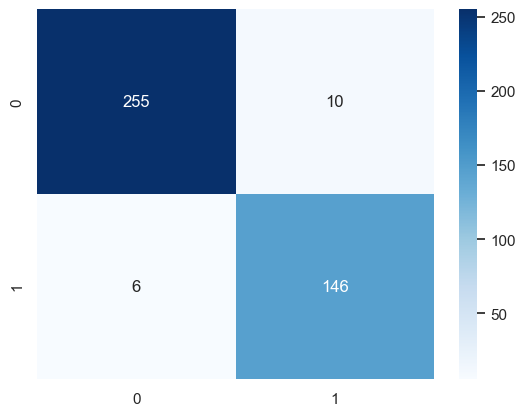

In [5]:
# confusion matrix hetmap
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')

In [36]:
# classification report
lr_cr = classification_report(y_test, lr_pred)
print(lr_cr)
lr_cr_DF = pd.DataFrame(metrics.classification_report(y_test, lr_pred, output_dict=True))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       265
           1       0.94      0.96      0.95       152

    accuracy                           0.96       417
   macro avg       0.96      0.96      0.96       417
weighted avg       0.96      0.96      0.96       417



In [12]:
# Get the true + false, positives and negatives
lr_tn = lr_cm[0][0]
lr_tp = lr_cm[1][1]
lr_fn = lr_cm[1][0]
lr_fp = lr_cm[0][1]

In [27]:
# accuracy score
lr_accuracy = accuracy_score(y_test, lr_pred)
print('Accuracy: %f' %lr_accuracy)

# precision, recall and specificity and f1 score
lr_precision = lr_tp/(lr_tp+lr_fp)
print('Precision: %f' %lr_precision)
lr_recall = lr_tp/(lr_tp+lr_fn)
print('Recall: %f' %lr_recall)
lr_specificity = lr_tn/(lr_tn+lr_fp)
print('Specificity: %f' %lr_specificity)
lr_f1 = f1_score(y_test, lr_pred)
print('F1 score: %f' %lr_f1)


Accuracy: 0.961631
Precision: 0.935897
Recall: 0.960526
Specificity: 0.962264
F1 score: 0.948052


Text(0.5, 1.0, 'Logistic Regression Metrics')

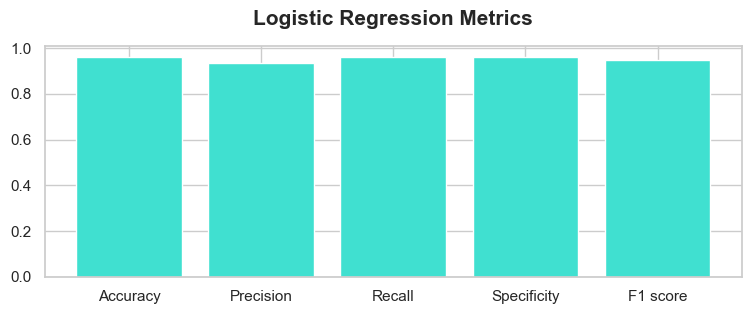

In [28]:
# plot results showing y axis 0 - 1
lr_dic = {'Accuracy': lr_accuracy, 'Precision': lr_precision, 'Recall': lr_recall, 'Specificity': lr_specificity, 'F1 score': lr_f1}
lr_names = list(lr_dic.keys())
lr_values = list(lr_dic.values())

plt.figure(figsize=(9, 3))
plt.bar(lr_names, lr_values, color='turquoise')
plt.title('Logistic Regression Metrics', fontsize=15, fontweight='bold', pad=15)

In [24]:
# AUC
lr_auc = roc_auc_score(y_test, lr_pred)
print('AUC: %f' %lr_auc)

AUC: 0.961395


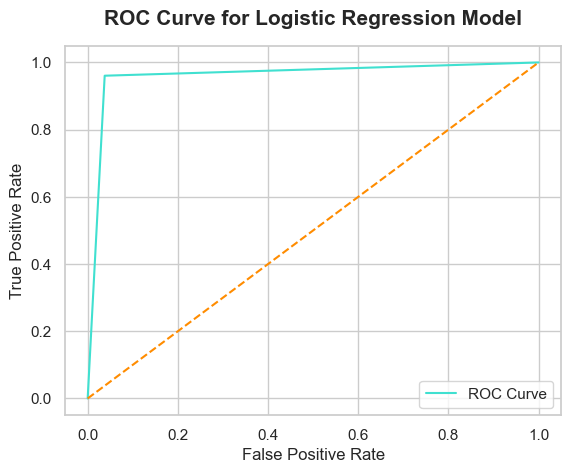

In [26]:
# ROC Curve
lr_fpr, lr_tpr = roc_curve(y_test, lr_pred)[0:2]
plt.plot(lr_fpr, lr_tpr, color='turquoise', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model', fontsize=15, fontweight='bold', pad=15)
plt.legend()

# SVM

In [43]:
# SVM
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)

# PREDICTIONS
svm_pred = svm.predict(X_test)


<AxesSubplot: >

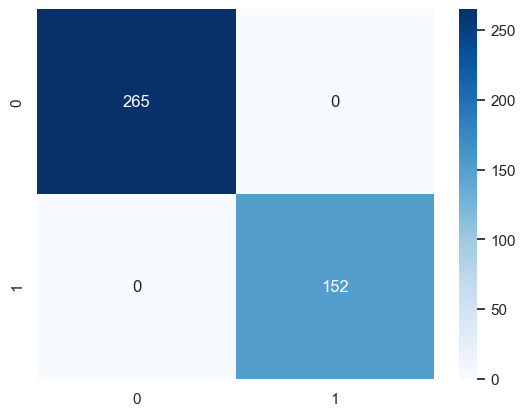

In [45]:
# confusion matrix heatmap
svm_cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')

In [46]:
# classification report
svm_cr = classification_report(y_test, svm_pred)
print(svm_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       152

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417



# Decision Tree

# KNN Nearest Neighbor

# Gaussian

# Linear Discriminant Analysis 